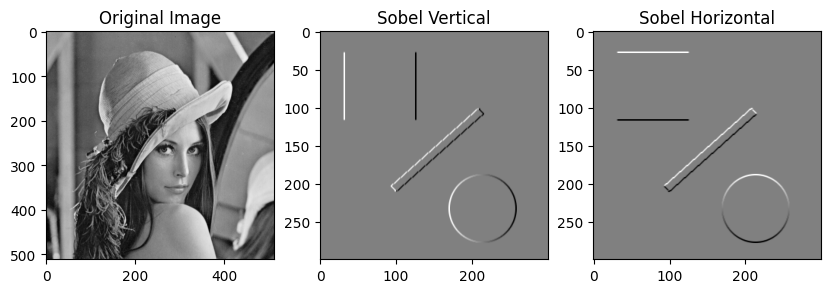

In [1]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from scipy.signal import convolve2d


from PIL import Image, ImageOps

from scipy import ndimage

def load_image(filename, as_gray=False, as_float=False):
    if as_gray:
        a = np.asarray(Image.open(filename).convert('L'))
    else:
        a = np.asarray(Image.open(filename))
    if as_float:
        return a.astype(np.float) / 255
    else:
        return a

def display_image(im, as_gray=False, title=None):
    plt.figure(figsize=(9,4))
    if as_gray:
        plt.imshow(im, cmap='gray')
    else:
        plt.imshow(im)
    if title is not None:
        plt.title(title)

def display_vec(v, title=None):
    plt.figure(figsize=(9,4))
    plt.plot(v)
    if title is not None:
        plt.title(title)

def sobel_filter_1d(image, axis='horizontal'):
    if axis == 'horizontal':
        kernel = np.array([1, 2, 1])
    elif axis == 'vertical':
        kernel = np.array([-1, 0, 1])
    else:
        raise ValueError("Axis must be 'horizontal' or 'vertical'")

    filtered_image = np.convolve(image, kernel, mode='same')
    return filtered_image


CircleLineRect = load_image('/content/CircleLineRect.png', as_gray=True, as_float=False)


#sobel_filter_1d(CircleLineRect, 'horizontal')

lena = load_image('/content/lena.png', as_gray=True, as_float=False)

zurlim = load_image('/content/zurlim.png', as_gray=True, as_float=False)






#2d Method used for Lena


vertical_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
horizontal_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

Ix = convolve2d(CircleLineRect, vertical_sobel, mode='same', boundary='wrap')
Iy = convolve2d(CircleLineRect, horizontal_sobel, mode='same', boundary='wrap')



plt.figure(figsize=(10, 4))

plt.subplot(131), plt.imshow(lena, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Ix, cmap='gray'), plt.title('Sobel Vertical')
plt.subplot(133), plt.imshow(Iy, cmap='gray'), plt.title('Sobel Horizontal')
plt.show()

In [2]:
print('Image dimensions:', CircleLineRect.shape)

Image dimensions: (300, 300)


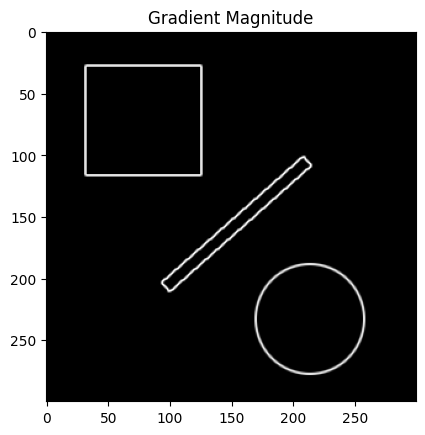

In [3]:
gradient_magnitude = np.sqrt(np.square(Ix) + np.square(Iy))

gradient_magnitude *= 255.0 / gradient_magnitude.max()

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()

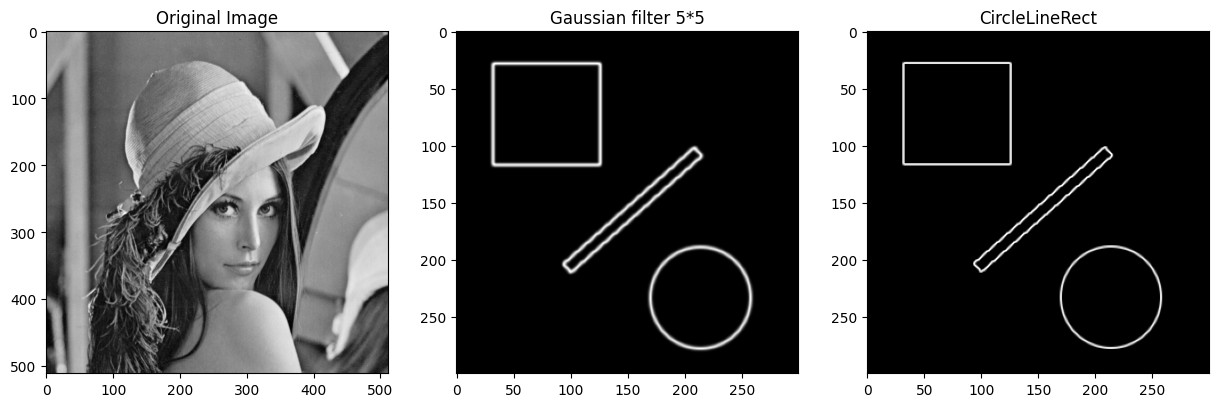

In [4]:
kernel_size = 10
sigma = 1.0

kernel = np.fromfunction(
    lambda x, y: (1/ (2 * np.pi * sigma**2)) *
                  np.exp(-((x - (kernel_size - 1) / 2)**2 + (y - (kernel_size - 1) / 2)**2) / (2 * sigma**2)),
    (kernel_size, kernel_size)
)
kernel /= np.sum(kernel)
Gaussien_filter_5 = convolve2d(gradient_magnitude, kernel, mode='same', boundary='wrap')

# Display the original and blurred images
plt.figure(figsize=(15, 10))
plt.subplot(131), plt.imshow(lena, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Gaussien_filter_5, cmap='gray'), plt.title('Gaussian filter 5*5')
plt.subplot(133),  plt.imshow(gradient_magnitude, cmap='gray'), plt.title('CircleLineRect')
plt.show()